In [1]:
# Code to load DataPCA.csv into the notebook
from google.colab import files
uploaded = files.upload()       #REF: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

Saving DataPCA.csv to DataPCA.csv


In [2]:
# Converting uploaded file to pandas dataframe
import pandas as pd                 # Data handling library
import io                           # To convert class type to bytes
data_df = pd.read_csv(io.BytesIO(uploaded['DataPCA.csv']))

In [3]:
# Code for data visualization (Different types of visualization performed)
import numpy as np                  # For linear algebra
import matplotlib.pyplot as plt     # To display plots
import seaborn as sns               # Also a plotting tool package
import sklearn                      # Machine learning library

# Simply printing the head values of the data
display(data_df.head())

# Storing number of data points and features
dim = data_df.shape
n_points = dim[0]
n_features = dim[1]

,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367


Clearly, all values are floating type numbers. There are seven features per data point

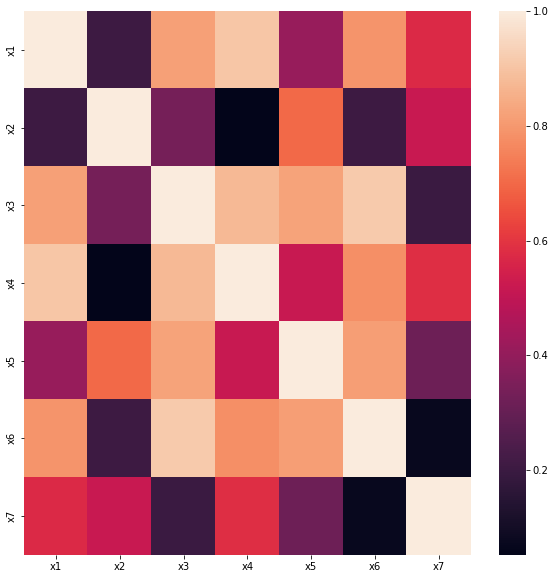

In [4]:
# To visualize correlation of the data
corrMatrix = data_df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(abs(corrMatrix), annot=False)
plt.show()

The correlation matrix provides no information, we proceed with training PCA using the PCA algorithm described in class

In [5]:
# Training PCA on the given data
from sklearn.preprocessing import StandardScaler        # To scale the data so that no feature influences PCA on account of size
data_arr = np.array(data_df)
data_scaled = StandardScaler().fit_transform(data_arr)
print(data_scaled.shape)
data_scaled[:5]

(190, 7)


array([[-0.87970185,  0.20358106, -0.7178119 ,  0.93713018,  0.24030982,
         0.572178  ,  0.81782988],
       [ 0.06690112, -0.16483345, -0.01377784, -0.04781199,  0.15160586,
         0.10228252, -0.215624  ],
       [ 0.49517799, -0.17241562,  0.55017623,  0.05204444, -0.80067599,
        -0.98890001,  0.83524673],
       [-1.81916995,  0.02163961, -1.68883952,  2.22057334,  0.93435972,
         1.5708594 ,  1.55195505],
       [ 0.55435664,  0.08974264,  0.5243477 , -0.85543839, -0.2369977 ,
        -0.40923082, -0.72077254]])

In [6]:
# Computing covariance matrix of the data
feature_v = data_scaled.T
cov_matrix = np.cov(feature_v)
print(cov_matrix.shape)

(7, 7)


Shape is consistent with what we have learnt in class

In [7]:
# Performing Eigen Decomposition of Covariance Matrix
e_val, e_vec = np.linalg.eig(cov_matrix)
print(e_val)       # To see which Eigen Values are large enough to consider

[4.28745955e+00 2.24805866e+00 4.57099193e-01 4.27316037e-02
 1.52019465e-03 1.39657631e-04 2.81829470e-05]


We can see that the first two components significantly capture most of the data, while the last three components capture negligible variation in the data

Text(0.5, 1.0, 'Variance Explained')

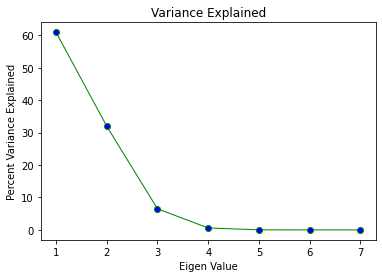

In [8]:
# Displaying the variance explained versus PCA dimensions
var_exp = []
tot_var = np.sum(e_val)
for i in range(len(e_val)):
    var_exp.append(100*e_val[i]/tot_var)
idx = [1, 2, 3, 4, 5, 6, 7]
plt.plot(idx, var_exp, color='green', linestyle='solid', linewidth=1, marker='o', markerfacecolor='blue', markersize=6)
plt.xlabel('Eigen Value')
plt.ylabel('Percent Variance Explained')
plt.title('Variance Explained')

We see that the first three components capture almost all the variance, and the last 4 capture negligible variance

Text(0.5, 1.0, 'MSE between reconstructed and original data')

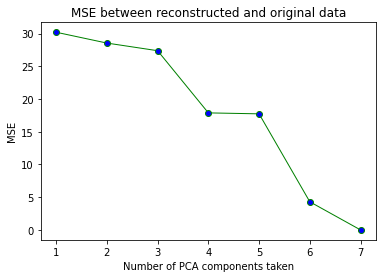

In [11]:
# To reconstruct the data and find the MSE with the actual data
mse = []
for i in range(1, n_features+1):       # For different sets of vectors considered
    e_vec_reduced = e_vec[:, :i]
    data_arr_transformed = (np.matmul(e_vec_reduced, np.matmul(e_vec_reduced.T, data_arr.T))).T
    difference = (data_arr-data_arr_transformed)
    error = np.sum(np.multiply(difference, difference))
    mse.append((1/(2*n_points))*error)

plt.plot(idx, mse, color='green', linestyle='solid', linewidth=1, marker='o', markerfacecolor='blue', markersize=6)
plt.xlabel('Number of PCA components taken')
plt.ylabel('MSE')
plt.title('MSE between reconstructed and original data')